In [ ]:
# pyright: reportAny=false, reportUnknownMemberType=false, reportUnusedCallResult=false
from omegaconf import OmegaConf
import hydra
import torchshow as ts
import torch as pt
from tqdm.notebook import tqdm

In [8]:
data_conf = OmegaConf.load(
    "tmgg/src/tmgg/experiments/hybrid_denoising/config/data/notebook-match.yaml"
)
data_conf

{'_target_': 'tmgg.experiment_utils.data.GraphDataModule', 'dataset_name': 'sbm', 'dataset_config': {'num_nodes': 20, 'min_blocks': 2, 'max_blocks': 4, 'min_block_size': 2, 'max_block_size': 15, 'p_intra': 1.0, 'q_inter': 0.0, 'num_train_partitions': 10, 'num_test_partitions': 10}, 'num_samples_per_graph': 1000, 'batch_size': 100, 'num_workers': 4, 'pin_memory': True, 'noise_type': 'digress', 'noise_levels': [0.005, 0.02, 0.05, 0.1, 0.25, 0.4, 0.5]}

In [11]:
dm = hydra.utils.instantiate(data_conf)

In [13]:
dm.prepare_data()

In [14]:
dm.setup()

In [16]:
len(dm.train_adjacency_matrices)

10

In [17]:
dl = dm.train_dataloader()

In [18]:
len(dl.dataset)

1000

In [28]:
dts_l = [dl.dataset[i] for i in tqdm(range(len(dl.dataset)))]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [29]:
(dts := pt.stack(dts_l)).shape

torch.Size([1000, 20, 20])

/home/igork/900_personal/900.000_research/900.003_shervin_graphgen/tmgg/.venv/lib/python3.13/site-packages/torchshow/visualization.py:148: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


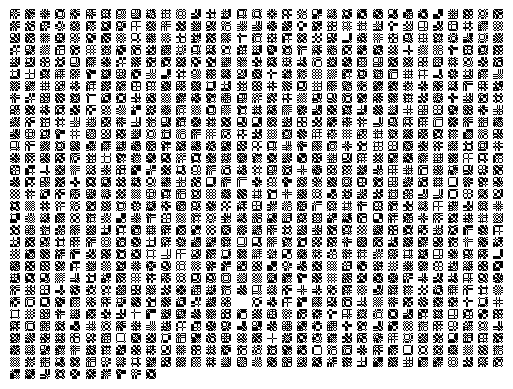

In [30]:
ts.show(dts)